In [11]:
"""
Demo notebook for Scientific Graph Agent.

This script demonstrates:
1. Basic usage of the agent graph
2. Memory functionality across multiple queries
3. Graph visualization
4. How the conditional loop works
"""

'\nDemo notebook for Scientific Graph Agent.\n\nThis script demonstrates:\n1. Basic usage of the agent graph\n2. Memory functionality across multiple queries\n3. Graph visualization\n4. How the conditional loop works\n'

# 🧪 Scientific Graph Agent - Demo

This notebook demonstrates a simple agent graph for scientific paper exploration using LangGraph + ArXiv API with memory support.

In [13]:
import os
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
LLM_MODEL = "gpt-5-mini"

In [15]:
# Verify that API keys are set
if not os.getenv("OPENAI_API_KEY"):
    raise ValueError("⚠️  OPENAI_API_KEY not found in .env file")

print("✅ Environment variables loaded")

✅ Environment variables loaded


## Graph Agent Initialization

In [16]:
from src.agent_graph import create_graph, AgentState

# Create graph with custom parameters
graph = create_graph(with_checkpointer=True)

print("✅ Agent graph created")

✅ Graph compiled with memory enabled
✅ Agent graph created


### Graph Visualization

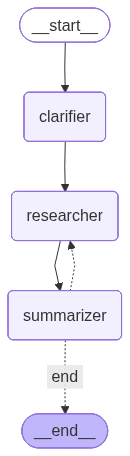

Graph structure:
START → clarifier → researcher → summarizer → END
           ↑            ↓
           └─(if <3 papers)


In [17]:
from IPython.display import Image, display
    
# Generate graph visualization as PNG
display(Image(graph.get_graph().draw_mermaid_png()))
print("Graph structure:")
print("START → clarifier → researcher → summarizer → END")
print("           ↑            ↓")
print("           └─(if <3 papers)")

## Tests

### Test 1: Simple Research Query

In [18]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "What are the key innovations in transformer architectures?"

# Only provide required fields + config
initial_state = {
    "query": question,
    "config": {
        "llm_model": LLM_MODEL,
        "llm_temperature": 0,
        "max_papers": 5,
        "max_iterations": 2,
    }
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = graph.invoke(initial_state, config=config)
result

Starting agent graph execution...

🎯 Clarifying query: 'What are the key innovations in transformer architectures?'


2025-10-21 17:56:19,425 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:56:19,439 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=transformer+innovations+self-attention+multi-head+positional+encodings+residual+connections+layernorm&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'transformer innovations self-attention multi-head positional encodings residual connections layernorm'
🔍 Searching ArXiv: 'transformer innovations self-attention multi-head positional encodings residual connections layernorm' (iteration 0)


2025-10-21 17:56:20,454 - INFO - Got first page: 100 of 562453 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:56:44,865 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated


{'query': 'What are the key innovations in transformer architectures?',
 'refined_query': 'transformer innovations self-attention multi-head positional encodings residual connections layernorm',
 'papers': [{'title': 'Exploring the Impact of Layer Normalization for Zero-shot Neural Machine Translation',
   'authors': ['Zhuoyuan Mao',
    'Raj Dabre',
    'Qianying Liu',
    'Haiyue Song',
    'Chenhui Chu',
    'Sadao Kurohashi'],
   'summary': 'This paper studies the impact of layer normalization (LayerNorm) on zero-shot\ntranslation (ZST). Recent efforts for ZST often utilize the Transformer\narchitecture as the backbone, with LayerNorm at the input of layers (PreNorm)\nset as the default. However, Xu et al. (2019) has revealed that PreNorm carries\nthe risk of overfitting the training data. Based on this, we hypothesize that\nPreNorm may overfit supervised directions and thus have low generalizability\nfor ZST. Through experiments on OPUS, IWSLT, and Europarl datasets for 54 ZST\ndi

In [19]:
# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"\n- Original query: {result['query']}")
print(f"- Refined query: {result['refined_query']}")
print(f"- Papers found: {len(result['papers'])}")
print(f"- Iterations: {result['iteration']}")
print(f"\n{result['summary']}")


FINAL RESULT

- Original query: What are the key innovations in transformer architectures?
- Refined query: transformer innovations self-attention multi-head positional encodings residual connections layernorm
- Papers found: 5
- Iterations: 1

## Résumé
• Le positionnement et le comportement de la normalisation de couche (LayerNorm) dans les blocs Transformer influencent fortement la stabilité d'entraînement et la généralisation en traduction zéro-shot. Des configurations "PreNorm" courantes peuvent accélérer la convergence mais risquent de suradapter les données d'entraînement, d'où l'intérêt d'étudier et d'ajuster cette composante pour de meilleures performances ZST. Ces choix de normalisation interagissent aussi avec d'autres changements d'architecture. [Paper 1, Paper 2]

• LayerNorm s'avère être un levier central pour les méthodes de fine-tuning à paramètres efficaces : modifier ou geler ses paramètres permet de réduire le coût d'adaptation tout en conservant des performances so

### Test 2: Query with Few Results (Triggers Loop)

In [20]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "quantum machine learning for protein folding using NISQ devices"

initial_state = {
    "query": question,
    "config": {
        "llm_model": LLM_MODEL,
        "llm_temperature": 0,
        "max_papers": 5,
        "max_iterations": 2,
    }
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = graph.invoke(initial_state, config=config)

# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"\n- Original query: {result['query']}")
print(f"- Refined query: {result['refined_query']}")
print(f"- Papers found: {len(result['papers'])}")
print(f"- Iterations: {result['iteration']}")
print(f"\n{result['summary']}")

Starting agent graph execution...

🎯 Clarifying query: 'quantum machine learning for protein folding using NISQ devices'


2025-10-21 17:56:50,186 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:56:50,195 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=NISQ+variational+quantum+algorithms+protein+folding&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'NISQ variational quantum algorithms protein folding'
🔍 Searching ArXiv: 'NISQ variational quantum algorithms protein folding' (iteration 1)


2025-10-21 17:56:51,175 - INFO - Got first page: 100 of 835056 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:57:14,021 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated

FINAL RESULT

- Original query: quantum machine learning for protein folding using NISQ devices
- Refined query: NISQ variational quantum algorithms protein folding
- Papers found: 5
- Iterations: 2

## Résumé
• NISQ-oriented algorithms adapt protein folding to near-term gate-based devices by using hybrid classical–quantum workflows and compressed evolutions (digitized counterdiabatic, variational ansätze). These approaches aim to reduce circuit depth and runtime while keeping the search for low-energy conformations feasible on limited hardware [Paper 1, Paper 2].  
• Problem encoding and lattice models are central: mapping amino-acid chains to lattice representations (cubic, tetrahedral) and compact encodings markedly lowers qubit and gate counts, at the cost of model fidelity. Efficient encodings also enable exploring free-energy landscapes more directly on quantum hardware [Paper 3, Paper 4].  
• Variational and QAOA-like methods (including alternating‑operator 

### Test 3: Memory Demonstration

In [21]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "demo-thread-3"}}

# First query
question1 = "Explain attention mechanisms"
result1 = graph.invoke({
    "query": question1,
    "config": {
        "llm_model": LLM_MODEL,
        "llm_temperature": 0,
        "max_papers": 5,
        "max_iterations": 2,
    }
}, config=config)

print(f"✅ First query completed - {len(result1['messages'])} messages in memory")

# Second query (same thread, memory persists automatically via checkpointer)
question2 = "What about self-attention?"
result2 = graph.invoke({
    "query": question2,
    "config": {
        "llm_model": LLM_MODEL,
        "llm_temperature": 0,
        "max_papers": 5,
        "max_iterations": 2,
    }
}, config=config)

print(f"✅ Second query completed - {len(result2['messages'])} messages in memory")

# Display message history
print("\n📜 Message History:")
for i, msg in enumerate(result2['messages'][-5:], 1):  # Show last 5 messages
    msg_type = msg.__class__.__name__
    name = getattr(msg, 'name', 'Unknown')
    content_preview = msg.content[:100] + "..." if len(msg.content) > 80 else msg.content
    print(f"  {i}. [{msg_type}] {name}: {content_preview}")

🎯 Clarifying query: 'Explain attention mechanisms'


2025-10-21 17:57:20,220 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:57:20,226 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=attention+mechanisms+in+neural+networks+review&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'attention mechanisms in neural networks review'
🔍 Searching ArXiv: 'attention mechanisms in neural networks review' (iteration 0)


2025-10-21 17:57:21,480 - INFO - Got first page: 100 of 2705421 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:57:45,685 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated
✅ First query completed - 4 messages in memory
🎯 Clarifying query: 'What about self-attention?'


2025-10-21 17:57:51,946 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-21 17:57:51,955 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=self-attention+mechanisms+in+transformers&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100


✨ Refined query: 'self-attention mechanisms in transformers'
🔍 Searching ArXiv: 'self-attention mechanisms in transformers' (iteration 1)


2025-10-21 17:57:53,036 - INFO - Got first page: 100 of 2695572 total results


📚 Found 5 papers
📝 Synthesizing 5 papers...


2025-10-21 17:58:17,979 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


✅ Summary generated
✅ Second query completed - 8 messages in memory

📜 Message History:
  1. [AIMessage] Summarizer: ## Résumé
• Attention is a mechanism that selects and differentially weights parts of an input so a ...
  2. [HumanMessage] User: What about self-attention?
  3. [AIMessage] Clarifier: Refined query: self-attention mechanisms in transformers
  4. [AIMessage] Researcher: Found 5 papers on ArXiv for query: self-attention mechanisms in transformers
  5. [AIMessage] Summarizer: ## Résumé
• Self-attention emerges from a more general principle of learned pairwise affinity matric...


### View Results in LangSmith Studio

### Option 1: View Past Runs (Tracing)

If you have `LANGCHAIN_TRACING_V2=true` in your `.env`:
1. Go to https://smith.langchain.com
2. Navigate to your project (e.g., "scientific-graph-agent")
3. Click on any run to see:
   - Full execution trace
   - Each node's input/output
   - LLM calls and tokens used
   - Execution time per node

### Option 2: Interactive Studio (Live Development)

To interact with your graph in real-time:

```bash
# In your terminal, run:
langgraph dev

# This will open in browser:
# https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
```

The Studio provides:
- **Visual graph editor** - See your nodes and edges
- **Interactive chat** - Test queries in real-time
- **State inspector** - View state after each node
- **Thread history** - Browse past conversations by thread_id
- **Debugger** - Step through execution node by node

**Quick Setup for Studio:**

1. Ensure `langgraph.json` exists in project root
2. Start the server: `langgraph dev`
3. Open https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
4. Click "New Thread" and type your question
5. Watch the graph execute in real-time!
